In [2]:
import os
import numpy as np
import shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

# Paths for dataset folders
input_dataset = "/kaggle/input/created-dataset-db"
output_dataset = "/kaggle/working/dataset2"

# Ensure the output dataset directory exists
if os.path.exists(output_dataset):
    shutil.rmtree(output_dataset)  # Remove old dataset if it exists
os.makedirs(output_dataset)

# Define basic augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Required class names
list1=os.listdir(input_dataset)
#required_classes = ["Mild", "Moderate", "No_DR", "Proliferate_DR", "Severe"]

# Process each class folder
for class_name in tqdm(list1, desc="Processing Classes"):
    class_path = os.path.join(input_dataset, class_name)
    
    if not os.path.exists(class_path):
        print(f"❌ Skipping {class_name}, folder not found.")
        continue
    
    # Create the new output class folder
    output_class_path = os.path.join(output_dataset, class_name)
    os.makedirs(output_class_path, exist_ok=True)
    
    # Load all images from the class folder
    images = [os.path.join(class_path, img) for img in os.listdir(class_path) if img.endswith(('png', 'jpg', 'jpeg'))]
    
    # Generate exactly 1000 augmented images
    num_images_generated = 0
    image_index = 0
    
    with tqdm(total=4000, desc=f"Augmenting {class_name}", leave=False) as pbar:
        while num_images_generated < 4000:
            img_path = images[image_index % len(images)]  # Loop through existing images
            img = load_img(img_path)  # Load image
            img = img.resize((100, 100))  # Resize to 100x100
            img_array = img_to_array(img)  # Convert to array
            img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions
            
            # Generate augmented images
            aug_iter = datagen.flow(img_array, batch_size=1)
            for _ in range(min(4000 - num_images_generated, 5)):  # Generate up to 5 images per iteration
                augmented_img = array_to_img(next(aug_iter)[0])  # Convert back to image
                augmented_img = augmented_img.resize((100, 100))  # Resize again to ensure size
                save_path = os.path.join(output_class_path, f"aug_{num_images_generated}.png")
                augmented_img.save(save_path)  # Save image
                num_images_generated += 1
                pbar.update(1)  # Update progress bar
            
            image_index += 1  # Move to the next image

print("✅ Data augmentation complete. Augmented dataset saved in 'dataset7'.")


2025-11-23 15:24:31.124760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763911471.299055      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763911471.348715      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Processing Classes: 100%|██████████| 5/5 [02:30<00:00, 30.06s/it]      

✅ Data augmentation complete. Augmented dataset saved in 'dataset7'.


In [3]:
import cv2
import os
import numpy as np
from tqdm import tqdm

def preprocess_and_save_with_subclasses2(input_dir, output_dir, target_size=(100,100)):
    """
    Preprocess images from input directory (with subclasses) and save to output directory.
    - Maintains the original folder structure (subclasses).
    - Applies image preprocessing: grayscale, CLAHE, Gaussian blur, Canny edge detection, and overlays edges in red.
    """
    # Initialize CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    list1=os.listdir(input_dir)

    for subclass in list1:
        subclass_path = os.path.join(input_dir, subclass)
        if not os.path.isdir(subclass_path):
            continue  # Skip files, only process folders
        
        # Create corresponding subclass folder in the output directory
        output_subclass_path = os.path.join(output_dir, subclass)
        if not os.path.exists(output_subclass_path):
            os.makedirs(output_subclass_path)
        
        # Process each image in the subclass folder
        for image_name in tqdm(os.listdir(subclass_path), desc=f"Processing {subclass}"):
            image_path = os.path.join(subclass_path, image_name)
            image = cv2.imread(image_path)
            
            if image is None:
                continue  # Skip invalid files
            
            # Resize image
            image = cv2.resize(image, target_size)
            
            # Convert to grayscale
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            
            # Apply CLAHE for contrast enhancement
            clahe_enhanced = clahe.apply(gray)
            
            # Apply Gaussian blur to reduce noise
            blurred = cv2.GaussianBlur(clahe_enhanced, (5, 5), 0)
            
            # Apply Canny edge detection
            edges = cv2.Canny(blurred, threshold1=50, threshold2=150)
            
            # Create an RGB edge map (edges in red)
            edges_colored = np.zeros_like(image)  # Create a black RGB image
            edges_colored[:, :, 2] = edges  # Set red channel to edges
            
            # Overlay the edges onto the original image
            combined = cv2.addWeighted(image, 0.8, edges_colored, 0.5, 0)
            
            # Save the processed image to the corresponding output folder
            output_path = os.path.join(output_subclass_path, image_name)
            cv2.imwrite(output_path, combined)


In [4]:
# Define input and output directories
input_directory = '/kaggle/working/dataset2'  # Contains subclass folders
output_directory = '/kaggle/working/dataset_preprocessed'  # Preprocessed images will be saved here

# Run preprocessing
preprocess_and_save_with_subclasses2(input_directory, output_directory)


Processing Prolifirate: 100%|██████████| 4000/4000 [00:09<00:00, 443.14it/s]


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2 
import os
import random

In [6]:
import os
import cv2
import numpy as np

def load_dataset(path_dataset, target_size=(100,100)): 
    dataset = []
    labels = []

    # Iterate over all folders in dataset_path
    for label in os.listdir(path_dataset):
        class_path = os.path.join(path_dataset, label)

        # check if the directory exists
        if os.path.isdir(class_path):
            # Initialize a counter for images in each class
            images_counter = 0
            
            # Iterate over all images in folder/class
            for image_name in os.listdir(class_path):
                image_path = os.path.join(class_path, image_name)

                # Load image with OpenCV
                image = cv2.imread(image_path)

                # Check if the image was loaded successfully
                if image is not None:
                    # Resize the image
                    image = cv2.resize(image, target_size)
                    # Get image dimensions
                    (h, w) = image.shape[:2]
                    
                    # Step 1: Apply random rotation between 0 to 5 degrees
                    angle = random.uniform(0, 5)  # Random angle between 0 and 5 degrees
                    center = (w // 2, h // 2)  # Center of the image
                    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)  # Rotation matrix
                    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
                    
                    # Step 2: Apply right-to-left flip
                    image = cv2.flip(rotated_image, 1)  # Flip horizontally
                    # Add image and label to dataset
                    dataset.append(image)
                    labels.append(label)


                else:
                    print(f"Error loading image: {image_path}")

    return np.array(dataset), np.array(labels)

dataset_path = "/kaggle/working/dataset_preprocessed"
dataset, labels = load_dataset(dataset_path)

In [ ]:
unique_labels, counts = np.unique(labels, return_counts=True)
class_counts = dict(zip(unique_labels, counts))

fig, ax = plt.subplots(figsize=(12, 6)) 
bars = ax.bar(class_counts.keys(), class_counts.values(), color='skyblue', width=0.6)  

ax.set_xlabel('Class')
ax.set_ylabel('Number of Images')
ax.set_title('Image Distribution by Class')

plt.show()

In [ ]:
import random
import matplotlib.pyplot as plt

def show_samples(dataset, labels, classes, num_samples):
    plt.figure(figsize=(12, 6))
    
    for i, class_name in enumerate(classes[:num_samples]):  # Show only the first num_samples classes
        indices_class = np.where(labels == class_name)[0]
        sample_index = random.choice(indices_class)
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(dataset[sample_index], cv2.COLOR_BGR2RGB))
        plt.title(f'{class_name}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


unique_classes = np.unique(labels)
show_samples(dataset, labels, unique_classes, num_samples=5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels into numbers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)



X_train, X_temp, y_train, y_temp = train_test_split(dataset, encoded_labels, test_size=0.2, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


def preprocess_image(image):
    resized_image = cv2.resize(image, (100,100))
    
    normalized_image = resized_image / 255.0
    return normalized_image


X_train = np.array([preprocess_image(image) for image in X_train])
X_test = np.array([preprocess_image(image) for image in X_test])
X_val = np.array([preprocess_image(image) for image in X_val])


print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

In [ ]:
!pip install efficientnet

In [11]:
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Define the number of classes
num_classes = len(np.unique(labels))

# Load EfficientNetB0 without the top classification layers
efficientnet_model = EfficientNetB0(input_shape=(100,100, 3), include_top=False, weights='/kaggle/input/efficientnet/tensorflow2/default/1/efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5')

# Create a new model
inputs = efficientnet_model.input

# Get the output of the last convolutional layer for Grad-CAM
conv_output = efficientnet_model.layers[-1].output

# Add a Global Average Pooling layer
x = GlobalAveragePooling2D()(conv_output)

# Add dense layers on top
x = Dense(128, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(64, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(32, kernel_regularizer=l1(0.0001), activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Final classification layer
outputs = Dense(units=num_classes, activation='softmax')(x)

# Combine into the model
model = models.Model(inputs=inputs, outputs=outputs)

# Define Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Compile the model
custom_optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))


500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8938 - loss: 0.9787 - val_accuracy: 0.9950 - val_loss: 0.6279
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9708 - loss: 0.7236 - val_accuracy: 0.9985 - val_loss: 0.5609
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 21s 41ms/step - accuracy: 0.9851 - loss: 0.6070 - val_accuracy: 0.9985 - val_loss: 0.4935
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9896 - loss: 0.5204 - val_accuracy: 0.9990 - val_loss: 0.4205
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9897 - loss: 0.4423 - val_accuracy: 1.0000 - val_loss: 0.3595
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9950 - loss: 0.3710 - val_accuracy: 0.9990 - val_loss: 0.3021
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9956 - loss: 0.3074 - val_accuracy: 1.0000 - val_loss: 0.2476
Epoch 9/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9964 - loss: 0.2506 - val_accurac

In [20]:
# Save the weights of the model to a file
model.save_weights('efficientnet_db.weights.h5')

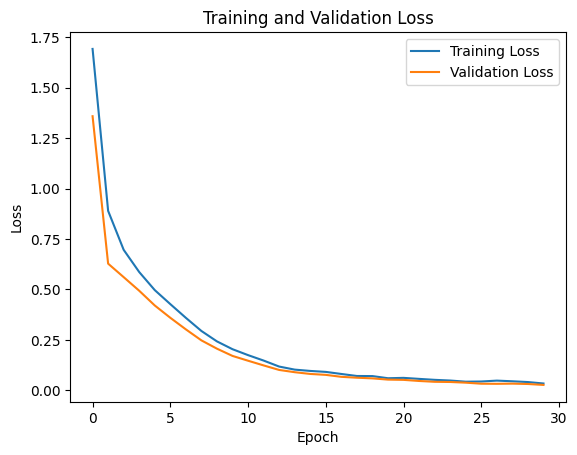

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

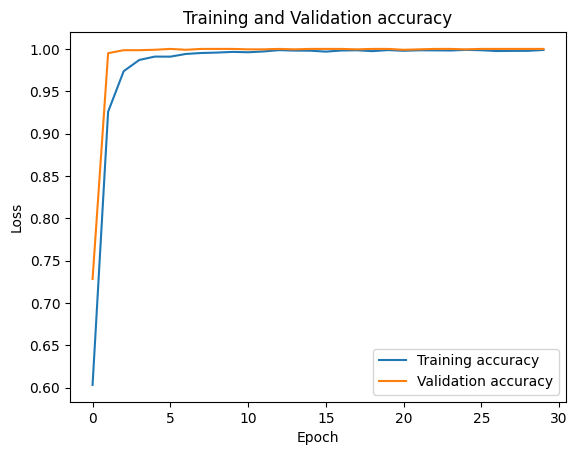

In [14]:
# Plot training and validation loss
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step
Test Accuracy: 1.0000


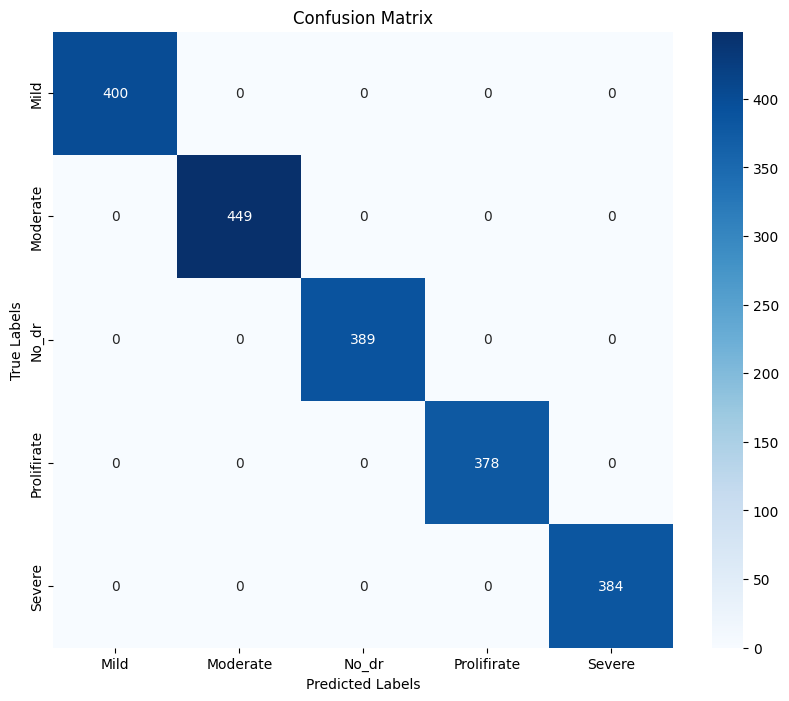

Classification Report:
              precision    recall  f1-score   support

        Mild     1.0000    1.0000    1.0000       400
    Moderate     1.0000    1.0000    1.0000       449
       No_dr     1.0000    1.0000    1.0000       389
 Prolifirate     1.0000    1.0000    1.0000       378
      Severe     1.0000    1.0000    1.0000       384

    accuracy                         1.0000      2000
   macro avg     1.0000    1.0000    1.0000      2000
weighted avg     1.0000    1.0000    1.0000      2000



In [15]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions and predicted classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True labels
y_true = y_test

# Calculate test accuracy
test_accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_, digits=4))


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor']]
Received: inputs=Tensor(shape=(1, 100, 100, 3))
  warnings.warn(msg)


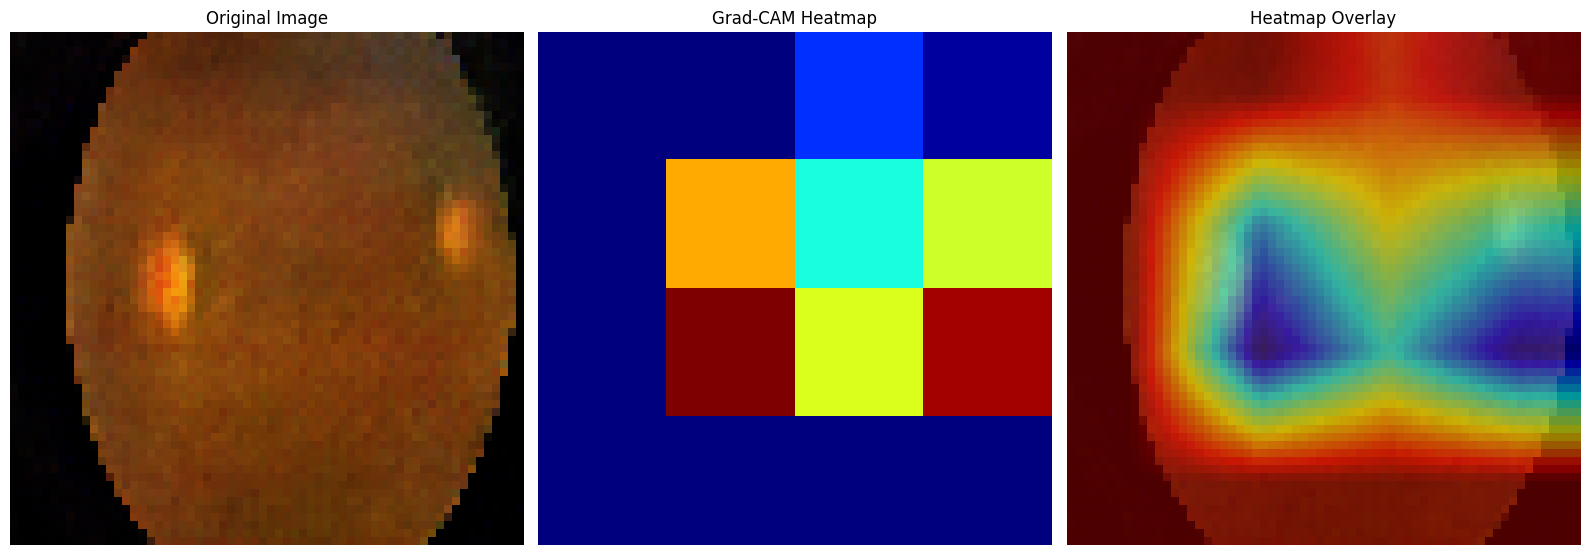

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

def generate_gradcam_heatmap(model, image, class_idx, last_conv_layer_name):
    # Build a model that maps the input image to the activations of the last conv layer and the predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(image, axis=0))
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)
    guided_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(guided_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def overlay_heatmap_on_image(heatmap, original_image, alpha=0.6, colormap=cv2.COLORMAP_JET):
    # Resize heatmap to match the original image size
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    # Convert heatmap to RGB
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), colormap)
    # Overlay the heatmap on the original image
    overlayed_image = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return overlayed_image

# Ask the user to provide the image path
image_path ="/kaggle/input/created-dataset-db/Prolifirate/generated_10.png"

# Load and preprocess the image
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
image = cv2.resize(original_image, (100,100)) / 255.0  # Resize and normalize

# Get the predicted class index
class_idx = np.argmax(model.predict(np.expand_dims(image, axis=0)))

# Generate the Grad-CAM heatmap
heatmap = generate_gradcam_heatmap(model, image, class_idx, last_conv_layer_name='top_conv')  # Adjust layer name

# Overlay the heatmap on the original image
overlayed_image = overlay_heatmap_on_image(heatmap, original_image)

# Plot the results
plt.figure(figsize=(16, 8))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

# Heatmap
plt.subplot(1, 3, 2)
plt.imshow(heatmap, cmap='jet')
plt.title("Grad-CAM Heatmap")
plt.axis("off")

# Heatmap overlaid on original image
plt.subplot(1, 3, 3)
plt.imshow(overlayed_image)
plt.title("Heatmap Overlay")
plt.axis("off")

plt.tight_layout()
plt.show()


In [25]:
# --------------------------------------------------------------
# 1. Imports & helpers
# --------------------------------------------------------------
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from efficientnet.tfkeras import EfficientNetB0
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --------------------------------------------------------------
# 2. Re-create the SAME architecture you trained
# --------------------------------------------------------------
def build_backbone_and_head(input_shape=(100, 100, 3),
                           weights_path=None,
                           num_classes=None):
    """
    Returns:
        model          – the full model (backbone + original head)
        conv_output    – tensor with the feature maps (for ProtoPNet)
        backbone       – only the EfficientNet part (frozen later)
    """
    efficientnet = EfficientNetB0(
        input_shape=input_shape,
        include_top=False,
        weights=weights_path  # your pre-downloaded .h5
    )

    inputs = efficientnet.input
    conv_output = efficientnet.output                     # (B, H, W, C)

    # ---- original classification head (exactly as you trained) ----
    x = layers.GlobalAveragePooling2D()(conv_output)
    x = layers.Dense(128, kernel_regularizer=tf.keras.regularizers.l1(0.0001),
                     activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l1(0.0001),
                     activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l1(0.0001),
                     activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    return model, conv_output, efficientnet

# --------------------------------------------------------------
# 3. Load the saved weights
# --------------------------------------------------------------
# ---- YOU MUST KNOW `num_classes` from the original training ----
num_classes = 5          # <-- replace with your real value
weights_path = '/kaggle/input/efficientnet/tensorflow2/default/1/efficientnet-b0_weights_tf_dim_ordering_tf_kernels_autoaugment_notop.h5'

full_model, conv_output, backbone = build_backbone_and_head(
    input_shape=(100, 100, 3),
    weights_path=weights_path,
    num_classes=num_classes
)

# Load the **trained** weights (only the head + fine-tuned backbone)
full_model.load_weights('efficientnet_db.weights.h5')

# --------------------------------------------------------------
# 4. Freeze the backbone (EfficientNet) – we only learn prototypes
# --------------------------------------------------------------
backbone.trainable = False

# --------------------------------------------------------------
# 5. ProtoPNet layer
# --------------------------------------------------------------
class ProtoLayer(tf.keras.layers.Layer):
    """
    Prototype layer:
        - 1×1 conv projects feature map to `prototype_dim`
        - `num_prototypes` learnable prototype vectors (shape: 1×1×prototype_dim)
        - similarity = -L2 distance (higher → more similar)
    """
    def __init__(self, num_prototypes, prototype_dim=128, **kwargs):
        super().__init__(**kwargs)
        self.num_prototypes = num_prototypes
        self.prototype_dim = prototype_dim

    def build(self, input_shape):
        # 1×1 conv to project feature map
        self.proj = layers.Conv2D(
            self.prototype_dim,
            kernel_size=1,
            strides=1,
            padding='valid',
            use_bias=False,
            name='proto_projection'
        )
        # prototype vectors (learnable)
        w_init = tf.random_normal_initializer()
        self.prototypes = self.add_weight(
            shape=(1, 1, self.num_prototypes, self.prototype_dim),
            initializer=w_init,
            trainable=True,
            name='prototypes'
        )
        super().build(input_shape)

    def call(self, feature_map):
        """
        feature_map : (B, H, W, C)
        Returns:
            similarity_map : (B, H, W, num_prototypes)
        """
        # (B, H, W, prototype_dim)
        projected = self.proj(feature_map)

        # expand prototypes for broadcasting
        prot = self.prototypes               # (1,1,P,D)

        # L2 distance per location
        dist = tf.reduce_sum(tf.square(projected[:, :, :, tf.newaxis, :] - prot), axis=-1)
        # similarity = -distance  (higher = more similar)
        similarity = -dist                     # (B, H, W, P)
        return similarity

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_prototypes": self.num_prototypes,
            "prototype_dim": self.prototype_dim
        })
        return config

# --------------------------------------------------------------
# 6. Build the **ProtoPNet** model (backbone + prototype layer + classifier)
# --------------------------------------------------------------
num_prototypes = 10 * num_classes   # common choice: 10 prototypes per class
prototype_dim = 128                 # same as first dense layer in original head

# inputs
inputs = backbone.input

# feature maps
feature_maps = backbone.output                     # (B, H, W, C)

# ---- prototype branch ----
proto_similarity = ProtoLayer(num_prototypes, prototype_dim)(feature_maps)  # (B,H,W,P)

# Global max pooling over spatial dimensions → one similarity score per prototype
proto_scores = layers.GlobalMaxPooling2D()(proto_similarity)   # (B, P)

# Small classifier on top of prototype scores
proto_head = layers.Dense(256, activation='relu')(proto_scores)
proto_head = layers.Dropout(0.3)(proto_head)
proto_outputs = layers.Dense(num_classes, activation='softmax',
                             name='proto_logits')(proto_head)

proto_model = models.Model(inputs, proto_outputs)

# --------------------------------------------------------------
# 7. Compile (only prototype-related weights are trainable)
# --------------------------------------------------------------
proto_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --------------------------------------------------------------
# 8. (Optional) Train the prototype layer on your data
# --------------------------------------------------------------
# Assuming you still have X_train, y_train, X_val, y_val as numpy arrays
# with shape (N,100,100,3) and integer labels.

# early_stop = callbacks.EarlyStopping(monitor='val_accuracy',
#                                      patience=7,
#                                      restore_best_weights=True)
#
# proto_model.fit(
#     X_train, y_train,
#     validation_data=(X_val, y_val),
#     epochs=50,
#     batch_size=32,
#     callbacks=[early_stop]
# )

# --------------------------------------------------------------
# 9. Function: get prototype activations for **any two images**
# --------------------------------------------------------------
# --------------------------------------------------------------
# 9. Function: get prototype activations for any two images
# --------------------------------------------------------------
def get_prototype_activations(model, img1, img2):
    """
    img1, img2 : any image that skimage can read (H, W, C) or (H, W)
    Returns:
        sim1, sim2 : (H_model, W_model, num_prototypes) similarity maps
        scores1, scores2 : (num_prototypes,) global max similarity per prototype
    """
    from skimage.transform import resize

    def _to_rgb(arr):
        arr = np.asarray(arr)
        if arr.ndim == 2:                     # grayscale → 3-channel
            arr = np.stack([arr] * 3, axis=-1)
        if arr.shape[-1] == 4:                # drop alpha
            arr = arr[..., :3]
        if arr.shape[-1] != 3:
            raise ValueError(f"Cannot convert to RGB, shape {arr.shape}")
        return arr

    img1 = _to_rgb(img1)
    img2 = _to_rgb(img2)

    # ---- resize to model input size (100×100) ----
    if img1.shape[:2] != (100, 100):
        img1 = resize(img1, (100, 100), anti_aliasing=True)
    if img2.shape[:2] != (100, 100):
        img2 = resize(img2, (100, 100), anti_aliasing=True)

    # ---- normalize to [0,1] ----
    imgs = np.stack([img1, img2], axis=0).astype('float32')
    if imgs.max() > 1.0:
        imgs /= 255.0

    # ---- intermediate model up to ProtoLayer ----
    proto_layer = next(l for l in model.layers if isinstance(l, ProtoLayer))
    intermediate = models.Model(model.input, proto_layer.output)

    # ---- predict similarity maps ----
    similarity_maps = intermediate.predict(imgs, verbose=0)   # (2, H, W, P)

    # ---- global max per prototype ----
    global_scores = np.max(np.max(similarity_maps, axis=2), axis=1)   # (2, P)

    return similarity_maps[0], similarity_maps[1], global_scores[0], global_scores[1]

# --------------------------------------------------------------
# 10. Visualise prototypes for two example images
# --------------------------------------------------------------
# --------------------------------------------------------------
# 10. FIXED: visualisation (handles any image size / channels)
# --------------------------------------------------------------
def visualise_prototypes(img1, img2, sim_map1, sim_map2,
                         top_k=5, figsize=(15, 8)):
    """
    img1, img2 : original (possibly high-res) images – any channel count
    sim_map1/2 : similarity maps from the model (H_model, W_model, P)
    """
    from skimage.transform import resize

    # ---------- helper: convert any image to RGB in [0,1] ----------
    def _prepare_img(img):
        img = np.asarray(img)
        if img.ndim == 2:                     # grayscale
            img = np.stack([img] * 3, axis=-1)
        if img.shape[-1] == 4:                # drop alpha
            img = img[..., :3]
        if img.max() > 1.0:
            img = img / 255.0
        return img.astype('float32')

    img1 = _prepare_img(img1)      # (H1, W1, 3) in [0,1]
    img2 = _prepare_img(img2)      # (H2, W2, 3) in [0,1]

    # ---------- overlay heatmap on *original* resolution ----------
    def overlay_heatmap(orig_img, heatmap):
        # heatmap: (H_model, W_model)
        # resize to original image size
        heatmap_resized = resize(
            heatmap,
            orig_img.shape[:2],
            anti_aliasing=True,
            order=1,                     # bilinear
            preserve_range=True
        )
        # normalise to [0,1]
        h = heatmap_resized
        h = (h - h.min()) / (h.ptp() + 1e-8)

        cmap = plt.cm.jet
        colored = cmap(h)[..., :3]                 # (H, W, 3)
        overlaid = 0.6 * orig_img + 0.4 * colored
        return np.clip(overlaid, 0, 1)

    # ---------- find globally top-k prototypes ----------
    all_max = np.concatenate([
        np.max(sim_map1, axis=(0, 1)),
        np.max(sim_map2, axis=(0, 1))
    ])
    top_idx = np.argsort(-all_max)[:top_k]

    # ---------- plotting ----------
    plt.figure(figsize=figsize)
    for i, p_idx in enumerate(top_idx):
        # ---- image 1 ----
        ax = plt.subplot(2, top_k, i + 1)
        heat1 = sim_map1[..., p_idx]                # (H_model, W_model)
        ov1 = overlay_heatmap(img1, heat1)
        ax.imshow(ov1)
        ax.set_title(f'Img1 Proto {p_idx}\nmax={np.max(heat1):.2f}')
        ax.axis('off')

        # ---- image 2 ----
        ax = plt.subplot(2, top_k, i + 1 + top_k)
        heat2 = sim_map2[..., p_idx]
        ov2 = overlay_heatmap(img2, heat2)
        ax.imshow(ov2)
        ax.set_title(f'Img2 Proto {p_idx}\nmax={np.max(heat2):.2f}')
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [26]:
# --------------------------------------------------------------
# UPDATED: visualise prototypes + draw bounding box
# --------------------------------------------------------------
def visualise_prototypes(img1, img2, sim_map1, sim_map2,
                         top_k=5, figsize=(15, 8)):
    """
    img1, img2 : original images
    sim_map1/2 : similarity maps from the model (H_model, W_model, P)
    Draws bounding boxes around the highest-activation region.
    """
    from skimage.transform import resize
    import matplotlib.patches as patches

    # ---------- helper: convert any image to RGB ----------
    def _prepare_img(img):
        img = np.asarray(img)
        if img.ndim == 2:                     # grayscale
            img = np.stack([img] * 3, axis=-1)
        if img.shape[-1] == 4:                # drop alpha
            img = img[..., :3]
        if img.max() > 1.0:
            img = img / 255.0
        return img.astype('float32')

    img1 = _prepare_img(img1)
    img2 = _prepare_img(img2)

    # ---------- overlay heatmap on *original* resolution ----------
    def overlay_heatmap(orig_img, heatmap):
        # resize to original resolution
        heatmap_resized = resize(
            heatmap, orig_img.shape[:2],
            anti_aliasing=True,
            order=1,
            preserve_range=True
        )

        h = heatmap_resized
        h = (h - h.min()) / (h.ptp() + 1e-8)

        cmap = plt.cm.jet
        colored = cmap(h)[..., :3]
        overlaid = 0.6 * orig_img + 0.4 * colored
        return np.clip(overlaid, 0, 1), h

    # ---------- find globally top-k prototypes ----------
    all_max = np.concatenate([
        np.max(sim_map1, axis=(0, 1)),
        np.max(sim_map2, axis=(0, 1))
    ])
    top_idx = np.argsort(-all_max)[:top_k]

    plt.figure(figsize=figsize)

    # ---------- plotting ----------
    for i, p_idx in enumerate(top_idx):

        # ===========================
        # IMAGE 1
        # ===========================
        heat1 = sim_map1[..., p_idx]
        ov1, resized1 = overlay_heatmap(img1, heat1)

        ax = plt.subplot(2, top_k, i + 1)
        ax.imshow(ov1)
        ax.set_title(f'Img1 Proto {p_idx}\nmax={np.max(heat1):.2f}')
        ax.axis('off')

        # find max location in resized heatmap
        y1, x1 = np.unravel_index(np.argmax(resized1), resized1.shape)

        # box size ~10% of image dims
        h_box = int(img1.shape[0] * 0.12)
        w_box = int(img1.shape[1] * 0.12)

        rect1 = patches.Rectangle(
            (x1 - w_box//2, y1 - h_box//2),
            w_box, h_box,
            linewidth=2, edgecolor='yellow', facecolor='none'
        )
        ax.add_patch(rect1)

        # ===========================
        # IMAGE 2
        # ===========================
        heat2 = sim_map2[..., p_idx]
        ov2, resized2 = overlay_heatmap(img2, heat2)

        ax = plt.subplot(2, top_k, i + 1 + top_k)
        ax.imshow(ov2)
        ax.set_title(f'Img2 Proto {p_idx}\nmax={np.max(heat2):.2f}')
        ax.axis('off')

        # find max location
        y2, x2 = np.unravel_index(np.argmax(resized2), resized2.shape)

        rect2 = patches.Rectangle(
            (x2 - w_box//2, y2 - h_box//2),
            w_box, h_box,
            linewidth=2, edgecolor='yellow', facecolor='none'
        )
        ax.add_patch(rect2)

    plt.tight_layout()
    plt.show()


In [27]:
def visualise_prototypes(img1, img2, sim_map1, sim_map2,
                         top_k=5, figsize=(15, 8)):
    """
    Visualise prototypes + draw bounding box around bluish (low activation)
    region using ONLY NumPy (NO skimage / NO scipy).
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from skimage.transform import resize   # safe, resize doesn't use convex hull

    # ---------- helper: convert any image to RGB ----------
    def _prepare_img(img):
        img = np.asarray(img)
        if img.ndim == 2:
            img = np.stack([img] * 3, axis=-1)
        if img.shape[-1] == 4:
            img = img[..., :3]
        if img.max() > 1.0:
            img = img / 255.0
        return img.astype('float32')

    img1 = _prepare_img(img1)
    img2 = _prepare_img(img2)

    # ---------- overlay heatmap ----------
    def overlay_heatmap(orig_img, heatmap):
        heatmap_resized = resize(
            heatmap, orig_img.shape[:2],
            anti_aliasing=True,
            order=1,
            preserve_range=True
        )

        h = heatmap_resized
        h = (h - h.min()) / (h.ptp() + 1e-8)

        cmap = plt.cm.jet
        colored = cmap(h)[..., :3]
        overlaid = 0.6 * orig_img + 0.4 * colored
        return np.clip(overlaid, 0, 1), h

    # ---------- find top-k prototypes ----------
    all_max = np.concatenate([
        np.max(sim_map1, axis=(0, 1)),
        np.max(sim_map2, axis=(0, 1))
    ])
    top_idx = np.argsort(-all_max)[:top_k]

    # ===========================================================
    # PURE NUMPY CONNECTED COMPONENT LABELING (NO SCIPY/SKIMAGE)
    # ===========================================================
    def ccl_numpy(binary_mask):
        """
        Connected component labeling using pure NumPy (4-connected).
        Returns list of bounding boxes for all connected components.
        """
        H, W = binary_mask.shape
        labels = np.zeros((H, W), dtype=np.int32)
        label_id = 1
        bboxes = []

        for r in range(H):
            for c in range(W):
                if binary_mask[r, c] and labels[r, c] == 0:
                    # flood fill stack
                    stack = [(r, c)]
                    minr, minc = r, c
                    maxr, maxc = r, c

                    labels[r, c] = label_id

                    while stack:
                        y, x = stack.pop()

                        # track bounding box
                        minr = min(minr, y)
                        minc = min(minc, x)
                        maxr = max(maxr, y)
                        maxc = max(maxc, x)

                        # neighbors (4-connected)
                        for ny, nx in [(y-1, x), (y+1, x), (y, x-1), (y, x+1)]:
                            if 0 <= ny < H and 0 <= nx < W:
                                if binary_mask[ny, nx] and labels[ny, nx] == 0:
                                    labels[ny, nx] = label_id
                                    stack.append((ny, nx))

                    bboxes.append((minr, minc, maxr, maxc))
                    label_id += 1

        return bboxes

    # ---------- choose largest blue region ----------
    def get_blue_box(resized_heatmap, thresh=0.25):
        blue_mask = resized_heatmap < thresh
        bboxes = ccl_numpy(blue_mask)
        if not bboxes:
            return None

        # pick largest region by area
        areas = [(br[2]-br[0]) * (br[3]-br[1]) for br in bboxes]
        return bboxes[np.argmax(areas)]

    # ---------- plotting ----------
    plt.figure(figsize=figsize)

    for i, p_idx in enumerate(top_idx):

        # ==================== IMAGE 1 ====================
        heat1 = sim_map1[..., p_idx]
        ov1, resized1 = overlay_heatmap(img1, heat1)

        ax = plt.subplot(2, top_k, i + 1)
        ax.imshow(ov1)
        ax.set_title(f"Img1 Proto {p_idx}")
        ax.axis("off")

        bbox = get_blue_box(resized1)
        if bbox is not None:
            minr, minc, maxr, maxc = bbox
            rect1 = patches.Rectangle(
                (minc, minr),
                maxc - minc,
                maxr - minr,
                linewidth=2, edgecolor='cyan', facecolor='none'
            )
            ax.add_patch(rect1)

        # ==================== IMAGE 2 ====================
        heat2 = sim_map2[..., p_idx]
        ov2, resized2 = overlay_heatmap(img2, heat2)

        ax = plt.subplot(2, top_k, i + 1 + top_k)
        ax.imshow(ov2)
        ax.set_title(f"Img2 Proto {p_idx}")
        ax.axis("off")

        bbox = get_blue_box(resized2)
        if bbox is not None:
            minr, minc, maxr, maxc = bbox
            rect2 = patches.Rectangle(
                (minc, minr),
                maxc - minc,
                maxr - minr,
                linewidth=2, edgecolor='cyan', facecolor='none'
            )
            ax.add_patch(rect2)

    plt.tight_layout()
    plt.show()


Top-3 prototype scores for image 1: [-18.00771  -18.025795 -18.07213 ]
Top-3 prototype scores for image 2: [-33.058846 -33.31208  -33.447002]


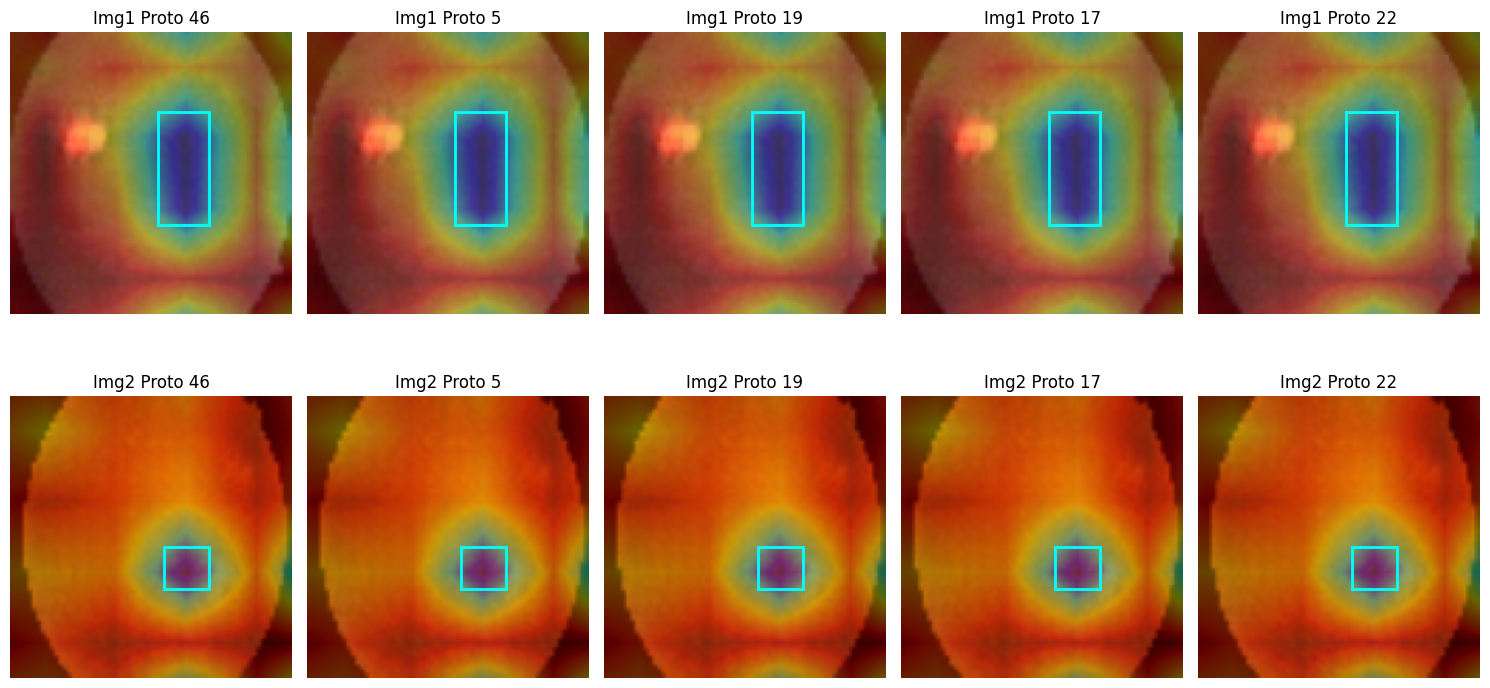

In [28]:
# --------------------------------------------------------------
# Example usage (replace with your own images)
# --------------------------------------------------------------
#if __name__ == "__main__":
    # ---- load two arbitrary images (100×100×3) ----
from skimage.io import imread
from skimage.transform import resize

img_path1 = '/kaggle/input/created-dataset-db/No_dr/generated_1.png'   # <-- replace
img_path2 = '/kaggle/input/created-dataset-db/Moderate/generated_100.png'   # <-- replace

img1 = imread(img_path1)
img2 = imread(img_path2)

img1 = resize(img1, (100,100), anti_aliasing=True)
img2 = resize(img2, (100,100), anti_aliasing=True)

sim1, sim2, scores1, scores2 = get_prototype_activations(proto_model, img1, img2)

print("Top-3 prototype scores for image 1:", scores1[np.argsort(-scores1)[:3]])
print("Top-3 prototype scores for image 2:", scores2[np.argsort(-scores2)[:3]])

visualise_prototypes(img1, img2, sim1, sim2, top_k=5)